# 16. Reindeer Maze

Find shortest path with fewest turns trough the maze

- Each move forwad costs 1
- Each rotation cw costs 1000

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import time

Scores = set()

def direction(i):
    return np.array([np.round(np.sin(np.pi * i * 1/2)), np.round(np.cos(np.pi * i * 1/2))], dtype = int)


Map = [[0 if cell == "." else 1 if cell == "#" else 2 if cell == "S" else 3 if cell == "E" else -1 for cell in line.strip("\n")] 
       for line in open("test.txt", "r").readlines()]

# Create set of Unvisited cells
# (key) : [cell type, score, orientation, preveriosCell]
Cells = {(x, y): [cell, float('inf'), -1, False] for x, line in enumerate(Map) for y, cell in enumerate(line) if cell != 1}

StartNode = [key for key, value in Cells.items() if value[0] == 2][0]

Cells[StartNode][1] = 0
Cells[StartNode][2] = 0
# Cells[StartNode][3] = tuple((0, 0))

while True:
    unvisited_cells = {key: value for key, value in Cells.items() if value[3] == False}
    # print(unvisited_cells)
    if not unvisited_cells:
        break # If there is no more unvisted cells, exit

    # I could stop here but I want to explore all other paths that
    # if Ctype == 3:
    #     print("Part 1:", Cscore)
    #     break

    currentNode = min(unvisited_cells, key=lambda k: unvisited_cells[k][1])
    Cells[currentNode][3] = True  # Mark current cell as visited

    Ctype, Cscore, Corient, Cvisited = Cells[currentNode]
    # print(currentNode, ": ", Ctype, Cscore, Corient, Cvisited)

    add1000 = False
    for i in range(0, 4):
        xi, yi = currentNode + direction(i)
        
        if (xi, yi) not in Cells:
            continue
        
        newScore = (1 if Corient == i else 1001) + Cscore
        
        if Cells[(xi, yi)][1] > newScore: 
            Cells[(xi, yi)][1] = newScore    
            Cells[(xi, yi)][2] = i # Assign next cells rotation
                
    Cells[currentNode][1] += 1000 if add1000 else 0


plt.figure(figsize=(7, 7))
plt.style.use('dark_background')
plt.imshow(Map)
for (x, y), (ctype, score, orientation, visited) in Cells.items():

    plt.text(y, x, score, color='white', fontsize=8, ha='center', va='center')
    
    orientation_symbols = ['>', 'v', '<', '^', ""]
    plt.text(y-0.3, x-0.3, orientation_symbols[orientation], color='RED', fontsize=5, ha='center', va='center')

plt.savefig("Out.png");
plt.close()
time.sleep(0.5)

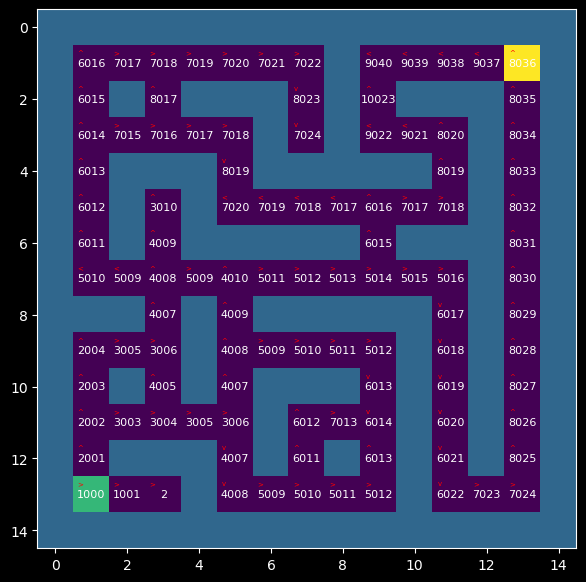

In [22]:
import re
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import time

Scores = set()

def direction(i):
    return np.array([np.round(np.sin(np.pi * i * 1/2)), np.round(np.cos(np.pi * i * 1/2))], dtype = int)


Map = [[0 if cell == "." else 1 if cell == "#" else 2 if cell == "S" else 3 if cell == "E" else -1 for cell in line.strip("\n")] 
       for line in open("test.txt", "r").readlines()]

# Create set of Unvisited cells
# (key) : [cell type, score, orientation, preveriosCell, timesFOund]
Cells = {(x, y): [cell, float('inf'), -1, False, 0] for x, line in enumerate(Map) for y, cell in enumerate(line) if cell != 1}

StartNode = [key for key, value in Cells.items() if value[0] == 2][0]

Cells[StartNode][1] = 0
Cells[StartNode][2] = 0
# Cells[StartNode][3] = tuple((0, 0))

while True:
    unvisited_cells = {key: value for key, value in Cells.items() if value[3] == False}
    # print(unvisited_cells)
    if not unvisited_cells:
        break # If there is no more unvisted cells, exit

    # I could stop here but I want to explore all other paths that
    # if Ctype == 3:
    #     print("Part 1:", Cscore)
    #     break

    currentNode = min(unvisited_cells, key=lambda k: unvisited_cells[k][1])
    Cells[currentNode][3] = True  # Mark current cell as visited

    Ctype, Cscore, Corient, Cvisited, timesFound = Cells[currentNode]
    # print(currentNode, ": ", Ctype, Cscore, Corient, Cvisited)

    for i in range(0, 4):
        xi, yi = currentNode + direction(i)
        
        if (xi, yi) not in Cells:
            continue
        
        Cells[(xi, yi)][4] += 1   
        newScore = (1 if Corient == i else 1001) + Cscore

        if Cells[(xi, yi)][1] > newScore: 
            Cells[(xi, yi)][1] = newScore    
            Cells[(xi, yi)][2] = i # Assign next cells rotation

        if Cells[(xi, yi)][4] == 2:
            Cells[(xi, yi)][1] += 1000   



StartNode = [key for key, value in Cells.items() if value[0] == 2][0]


plt.figure(figsize=(7, 7))
plt.style.use('dark_background')
plt.imshow(Map)
for (x, y), (ctype, score, orientation, visited, timesFound) in Cells.items():

    plt.text(y, x, score, color='white', fontsize=8, ha='center', va='center')
    
    orientation_symbols = ['>', 'v', '<', '^', ""]
    plt.text(y-0.3, x-0.3, orientation_symbols[orientation], color='RED', fontsize=5, ha='center', va='center')

plt.savefig("Out.png");

Part 2: 22


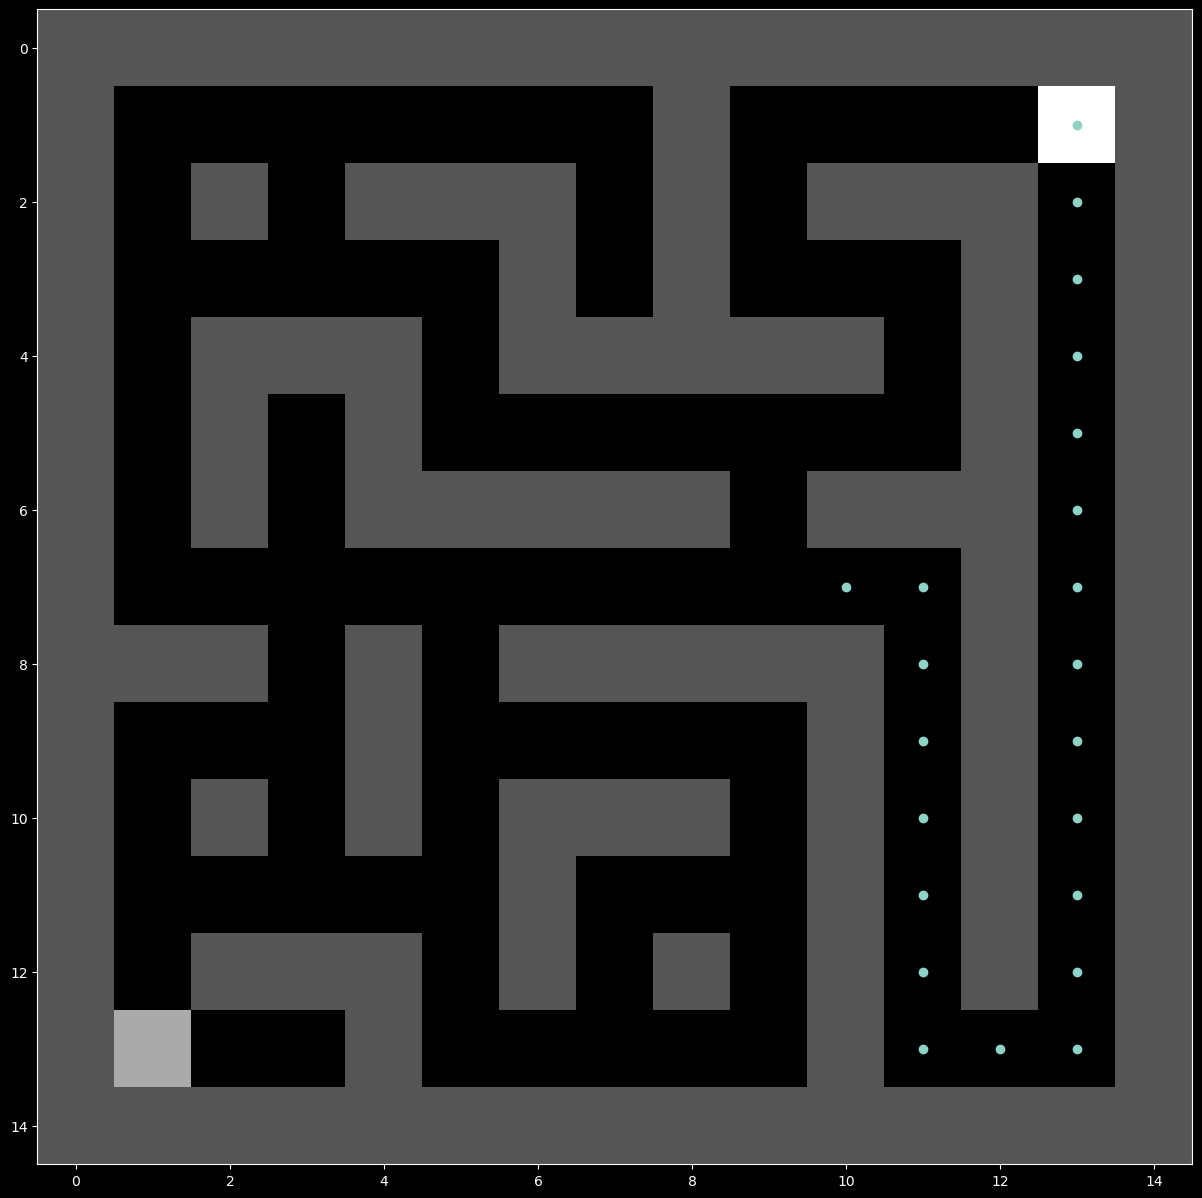

In [24]:

def findAllLowTiles(CurrentCell, visited = set()):
    visited.add(CurrentCell)
    # print(CurrentCell)

    for i in range(4, 0, -1):
        NextCell = tuple(np.array(CurrentCell) + direction(i))
        if NextCell not in Cells:
            continue

        if NextCell not in visited and Cells[NextCell][1] <= Cells[CurrentCell][1]:
            visited.update(findAllLowTiles(NextCell, visited))
            
    return visited

end = [key for key, value in Cells.items() if value[0] == 3][0]  # End node
lowTiles = findAllLowTiles(end, set())

print("Part 2:", len(lowTiles))

# Plot the path on the existing plot
plt.figure(figsize=(15, 15))
plt.style.use('dark_background')
plt.imshow(Map, cmap='gray')

# plt.plot(path[1], path[0], color='Yellow')

lowTiles = np.transpose(list(lowTiles))

plt.scatter(lowTiles[1], lowTiles[0])

plt.savefig("Out.png");